# Deep Q-Learning - Train a DQN Model Mean Evaluation: 7.89

Install dependencies for AI gym to run properly (shouldn't take more than a minute). If running on google cloud or running locally, only need to run once. Colab may require installing everytime the vm shuts down.

In [9]:
# # !apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb
# %pip install -U tf-agents pyvirtualdisplay
# %pip install -U gym[box2d,atari,accept-rom-license]

In [2]:
# !apt install -y xvfb python-opengl ffmpeg

In [3]:
# !pip3 install -U gym>=0.21.0
# !pip3 install --upgrade setuptools --user
# !pip3 install ez_setup 
# !pip3 install -U gym[box2d,atari,accept-rom-license]

For this assignment we will implement the Deep Q-Learning algorithm with Experience Replay as described in breakthrough paper __"Playing Atari with Deep Reinforcement Learning"__. We will train an agent to play the famous game of __Breakout__.

In [1]:
%matplotlib inline

import sys
import gym
import torch
import pylab
import random
import numpy as np
from collections import deque
from datetime import datetime
from copy import deepcopy
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from utils import find_max_lives, check_live, get_frame, get_init_state
from model import DQN, DQN_LSTM
from config import *

import matplotlib.pyplot as plt
# %load_ext autoreload
# %autoreload 2

In [2]:
import joblib

## Understanding the environment

In the following cell, we initialize our game of __Breakout__ and you can see how the environment looks like. For further documentation of the of the environment refer to https://gym.openai.com/envs. 

In breakout, we will use 3 actions "fire", "left", and "right". "fire" is only used to reset the game when a life is lost, "left" moves the agent left and "right" moves the agent right.

In [3]:
env = gym.make('BreakoutDeterministic-v4')
state = env.reset()

In [4]:
number_lives = find_max_lives(env)
state_size = env.observation_space.shape
action_size = 3 #fire, left, and right

## Creating a DQN Agent

Here we create a DQN Agent. This agent is defined in the __agent.py__. The corresponding neural network is defined in the __model.py__. Once you've created a working DQN agent, use the code in agent.py to create a double DQN agent in __agent_double.py__. Set the flag "double_dqn" to True to train the double DQN agent.

__Evaluation Reward__ : The average reward received in the past 100 episodes/games.

__Frame__ : Number of frames processed in total.

__Memory Size__ : The current size of the replay memory.

In [5]:
double_dqn = True# set to True if using double DQN agent

if double_dqn:
    from agent_double import Agent
else:
    from agent import Agent

agent = Agent(action_size)
evaluation_reward = deque(maxlen=evaluation_reward_length)
frame = 0
memory_size = 0

init agent, action size: 3
100000


### Main Training Loop

In this training loop, we do not render the screen because it slows down training signficantly. To watch the agent play the game, run the code in next section "Visualize Agent Performance"

In [6]:
continue_training = False

if continue_training == False:
    rewards, episodes = [], []
    best_eval_reward = 0
    start = 0
else:
    # load training params
#     agent = joblib.load("prev_agent")
#     params = joblib.load("prev_params")
    # load training model
    agent.policy_net.load_state_dict(torch.load('./save_model/breakout_DQN_2021_episodes.pth', map_location=torch.device('cpu')))
#     agent.memory = params["agent_memory"]
#     agent.epsilon = params["epsilon"]
#     rewards = params["rewards"]
#     episodes = params["episodes"]
#     best_eval_reward = params["best_eval_reward"]
#     start = params["episodes"][-1]  
    start = 2000

episode: 0   score: 3.0   memory length: 228   epsilon: 1.0    steps: 228    lr: 0.0001     evaluation reward: 3.0
episode: 1   score: 1.0   memory length: 380   epsilon: 1.0    steps: 152    lr: 0.0001     evaluation reward: 2.0
episode: 2   score: 5.0   memory length: 701   epsilon: 1.0    steps: 321    lr: 0.0001     evaluation reward: 3.0
episode: 3   score: 1.0   memory length: 871   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 2.5
episode: 4   score: 1.0   memory length: 1042   epsilon: 1.0    steps: 171    lr: 0.0001     evaluation reward: 2.2
episode: 5   score: 0.0   memory length: 1165   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.8333333333333333
episode: 6   score: 1.0   memory length: 1334   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.7142857142857142
episode: 7   score: 2.0   memory length: 1533   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.75
episode: 8   score: 0.0   memory length: 1656

episode: 65   score: 2.0   memory length: 12090   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.4696969696969697
episode: 66   score: 0.0   memory length: 12213   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.4477611940298507
episode: 67   score: 2.0   memory length: 12414   epsilon: 1.0    steps: 201    lr: 0.0001     evaluation reward: 1.4558823529411764
episode: 68   score: 5.0   memory length: 12738   epsilon: 1.0    steps: 324    lr: 0.0001     evaluation reward: 1.5072463768115942
episode: 69   score: 2.0   memory length: 12937   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.5142857142857142
episode: 70   score: 2.0   memory length: 13138   epsilon: 1.0    steps: 201    lr: 0.0001     evaluation reward: 1.5211267605633803
episode: 71   score: 1.0   memory length: 13308   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.5138888888888888
episode: 72   score: 2.0   memory length: 13507   epsilon: 1.0    ste

episode: 131   score: 2.0   memory length: 24376   epsilon: 1.0    steps: 221    lr: 0.0001     evaluation reward: 1.53
episode: 132   score: 0.0   memory length: 24500   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.52
episode: 133   score: 0.0   memory length: 24624   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.51
episode: 134   score: 0.0   memory length: 24747   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.5
episode: 135   score: 3.0   memory length: 24976   epsilon: 1.0    steps: 229    lr: 0.0001     evaluation reward: 1.53
episode: 136   score: 0.0   memory length: 25100   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.51
episode: 137   score: 1.0   memory length: 25252   epsilon: 1.0    steps: 152    lr: 0.0001     evaluation reward: 1.51
episode: 138   score: 2.0   memory length: 25452   epsilon: 1.0    steps: 200    lr: 0.0001     evaluation reward: 1.53
episode: 139   score: 3.0   memory length

episode: 200   score: 1.0   memory length: 37079   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.45
episode: 201   score: 0.0   memory length: 37203   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.44
episode: 202   score: 3.0   memory length: 37450   epsilon: 1.0    steps: 247    lr: 0.0001     evaluation reward: 1.45
episode: 203   score: 2.0   memory length: 37669   epsilon: 1.0    steps: 219    lr: 0.0001     evaluation reward: 1.46
episode: 204   score: 1.0   memory length: 37821   epsilon: 1.0    steps: 152    lr: 0.0001     evaluation reward: 1.45
episode: 205   score: 1.0   memory length: 37990   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.45
episode: 206   score: 3.0   memory length: 38237   epsilon: 1.0    steps: 247    lr: 0.0001     evaluation reward: 1.48
episode: 207   score: 1.0   memory length: 38407   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.46
episode: 208   score: 0.0   memory lengt

episode: 269   score: 2.0   memory length: 49663   epsilon: 1.0    steps: 181    lr: 0.0001     evaluation reward: 1.38
episode: 270   score: 1.0   memory length: 49832   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.39
episode: 271   score: 2.0   memory length: 50048   epsilon: 1.0    steps: 216    lr: 0.0001     evaluation reward: 1.41
episode: 272   score: 0.0   memory length: 50172   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.41
episode: 273   score: 2.0   memory length: 50352   epsilon: 1.0    steps: 180    lr: 0.0001     evaluation reward: 1.42
episode: 274   score: 0.0   memory length: 50475   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.42
episode: 275   score: 0.0   memory length: 50599   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.41
episode: 276   score: 1.0   memory length: 50750   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.4
episode: 277   score: 3.0   memory length

episode: 338   score: 1.0   memory length: 62192   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.44
episode: 339   score: 0.0   memory length: 62315   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.44
episode: 340   score: 1.0   memory length: 62486   epsilon: 1.0    steps: 171    lr: 0.0001     evaluation reward: 1.43
episode: 341   score: 0.0   memory length: 62610   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.41
episode: 342   score: 2.0   memory length: 62808   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.43
episode: 343   score: 0.0   memory length: 62932   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.42
episode: 344   score: 1.0   memory length: 63086   epsilon: 1.0    steps: 154    lr: 0.0001     evaluation reward: 1.41
episode: 345   score: 0.0   memory length: 63210   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.38
episode: 346   score: 2.0   memory lengt

episode: 407   score: 2.0   memory length: 74062   epsilon: 1.0    steps: 183    lr: 0.0001     evaluation reward: 1.29
episode: 408   score: 1.0   memory length: 74213   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.29
episode: 409   score: 4.0   memory length: 74489   epsilon: 1.0    steps: 276    lr: 0.0001     evaluation reward: 1.31
episode: 410   score: 0.0   memory length: 74613   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.3
episode: 411   score: 4.0   memory length: 74928   epsilon: 1.0    steps: 315    lr: 0.0001     evaluation reward: 1.32
episode: 412   score: 2.0   memory length: 75126   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.34
episode: 413   score: 2.0   memory length: 75324   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.33
episode: 414   score: 4.0   memory length: 75641   epsilon: 1.0    steps: 317    lr: 0.0001     evaluation reward: 1.35
episode: 415   score: 1.0   memory length

episode: 476   score: 1.0   memory length: 86383   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.4
episode: 477   score: 0.0   memory length: 86507   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.4
episode: 478   score: 0.0   memory length: 86630   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.4
episode: 479   score: 4.0   memory length: 86899   epsilon: 1.0    steps: 269    lr: 0.0001     evaluation reward: 1.41
episode: 480   score: 3.0   memory length: 87147   epsilon: 1.0    steps: 248    lr: 0.0001     evaluation reward: 1.42
episode: 481   score: 1.0   memory length: 87299   epsilon: 1.0    steps: 152    lr: 0.0001     evaluation reward: 1.43
episode: 482   score: 1.0   memory length: 87451   epsilon: 1.0    steps: 152    lr: 0.0001     evaluation reward: 1.44
episode: 483   score: 0.0   memory length: 87574   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.43
episode: 484   score: 2.0   memory length: 

episode: 545   score: 2.0   memory length: 99655   epsilon: 1.0    steps: 202    lr: 0.0001     evaluation reward: 1.56
episode: 546   score: 3.0   memory length: 99872   epsilon: 1.0    steps: 217    lr: 0.0001     evaluation reward: 1.55


C:\Users\Nbsyxx\Desktop\assignment5\assignment5_materials\memory.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sample = np.array(sample)
C:\Users\Nbsyxx\Desktop\assignment5\assignment5_materials\agent.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mini_batch = np.array(mini_batch).transpose()


episode: 547   score: 2.0   memory length: 100000   epsilon: 0.9998574400000031    steps: 199    lr: 0.0001     evaluation reward: 1.56
episode: 548   score: 3.0   memory length: 100000   epsilon: 0.9993683800000137    steps: 247    lr: 0.0001     evaluation reward: 1.59
episode: 549   score: 2.0   memory length: 100000   epsilon: 0.9989268400000233    steps: 223    lr: 0.0001     evaluation reward: 1.58
episode: 550   score: 3.0   memory length: 100000   epsilon: 0.9984021400000347    steps: 265    lr: 0.0001     evaluation reward: 1.61
episode: 551   score: 0.0   memory length: 100000   epsilon: 0.99815662000004    steps: 124    lr: 0.0001     evaluation reward: 1.6
episode: 552   score: 2.0   memory length: 100000   epsilon: 0.9977645800000485    steps: 198    lr: 0.0001     evaluation reward: 1.61
episode: 553   score: 2.0   memory length: 100000   epsilon: 0.997372540000057    steps: 198    lr: 0.0001     evaluation reward: 1.62
episode: 554   score: 0.0   memory length: 100000   

episode: 608   score: 2.0   memory length: 100000   epsilon: 0.977016160000499    steps: 199    lr: 0.0001     evaluation reward: 1.58
episode: 609   score: 2.0   memory length: 100000   epsilon: 0.9766597600005067    steps: 180    lr: 0.0001     evaluation reward: 1.6
episode: 610   score: 1.0   memory length: 100000   epsilon: 0.9763588000005132    steps: 152    lr: 0.0001     evaluation reward: 1.61
episode: 611   score: 3.0   memory length: 100000   epsilon: 0.975907360000523    steps: 228    lr: 0.0001     evaluation reward: 1.63
episode: 612   score: 0.0   memory length: 100000   epsilon: 0.9756638200005283    steps: 123    lr: 0.0001     evaluation reward: 1.6
episode: 613   score: 4.0   memory length: 100000   epsilon: 0.9751133800005403    steps: 278    lr: 0.0001     evaluation reward: 1.64
episode: 614   score: 0.0   memory length: 100000   epsilon: 0.9748678600005456    steps: 124    lr: 0.0001     evaluation reward: 1.62
episode: 615   score: 1.0   memory length: 100000   

episode: 669   score: 0.0   memory length: 100000   epsilon: 0.9550500400009758    steps: 124    lr: 0.0001     evaluation reward: 1.55
episode: 670   score: 2.0   memory length: 100000   epsilon: 0.9546560200009844    steps: 199    lr: 0.0001     evaluation reward: 1.55
episode: 671   score: 0.0   memory length: 100000   epsilon: 0.9544124800009897    steps: 123    lr: 0.0001     evaluation reward: 1.53
episode: 672   score: 3.0   memory length: 100000   epsilon: 0.9539491600009997    steps: 234    lr: 0.0001     evaluation reward: 1.56
episode: 673   score: 2.0   memory length: 100000   epsilon: 0.953519500001009    steps: 217    lr: 0.0001     evaluation reward: 1.58
episode: 674   score: 2.0   memory length: 100000   epsilon: 0.9530819200010185    steps: 221    lr: 0.0001     evaluation reward: 1.58
episode: 675   score: 4.0   memory length: 100000   epsilon: 0.9525671200010297    steps: 260    lr: 0.0001     evaluation reward: 1.61
episode: 676   score: 1.0   memory length: 100000

episode: 730   score: 4.0   memory length: 100000   epsilon: 0.9318028600014805    steps: 320    lr: 0.0001     evaluation reward: 1.63
episode: 731   score: 1.0   memory length: 100000   epsilon: 0.931503880001487    steps: 151    lr: 0.0001     evaluation reward: 1.62
episode: 732   score: 0.0   memory length: 100000   epsilon: 0.9312583600014923    steps: 124    lr: 0.0001     evaluation reward: 1.6
episode: 733   score: 2.0   memory length: 100000   epsilon: 0.9308623600015009    steps: 200    lr: 0.0001     evaluation reward: 1.59
episode: 734   score: 0.0   memory length: 100000   epsilon: 0.9306168400015062    steps: 124    lr: 0.0001     evaluation reward: 1.59
episode: 735   score: 0.0   memory length: 100000   epsilon: 0.9303713200015116    steps: 124    lr: 0.0001     evaluation reward: 1.59
episode: 736   score: 2.0   memory length: 100000   epsilon: 0.9299792800015201    steps: 198    lr: 0.0001     evaluation reward: 1.6
episode: 737   score: 1.0   memory length: 100000  

episode: 791   score: 4.0   memory length: 100000   epsilon: 0.9086467600019832    steps: 276    lr: 0.0001     evaluation reward: 1.68
episode: 792   score: 4.0   memory length: 100000   epsilon: 0.9080943400019952    steps: 279    lr: 0.0001     evaluation reward: 1.72
episode: 793   score: 4.0   memory length: 100000   epsilon: 0.907504300002008    steps: 298    lr: 0.0001     evaluation reward: 1.74
episode: 794   score: 2.0   memory length: 100000   epsilon: 0.9071439400020158    steps: 182    lr: 0.0001     evaluation reward: 1.74
episode: 795   score: 1.0   memory length: 100000   epsilon: 0.9068073400020231    steps: 170    lr: 0.0001     evaluation reward: 1.75
episode: 796   score: 2.0   memory length: 100000   epsilon: 0.9064073800020318    steps: 202    lr: 0.0001     evaluation reward: 1.75
episode: 797   score: 1.0   memory length: 100000   epsilon: 0.9060668200020392    steps: 172    lr: 0.0001     evaluation reward: 1.75
episode: 798   score: 3.0   memory length: 100000

episode: 852   score: 1.0   memory length: 100000   epsilon: 0.8861638600024713    steps: 170    lr: 0.0001     evaluation reward: 1.64
episode: 853   score: 0.0   memory length: 100000   epsilon: 0.8859183400024766    steps: 124    lr: 0.0001     evaluation reward: 1.64
episode: 854   score: 0.0   memory length: 100000   epsilon: 0.8856728200024819    steps: 124    lr: 0.0001     evaluation reward: 1.64
episode: 855   score: 0.0   memory length: 100000   epsilon: 0.8854273000024873    steps: 124    lr: 0.0001     evaluation reward: 1.62
episode: 856   score: 0.0   memory length: 100000   epsilon: 0.8851837600024925    steps: 123    lr: 0.0001     evaluation reward: 1.62
episode: 857   score: 0.0   memory length: 100000   epsilon: 0.8849382400024979    steps: 124    lr: 0.0001     evaluation reward: 1.58
episode: 858   score: 0.0   memory length: 100000   epsilon: 0.8846927200025032    steps: 124    lr: 0.0001     evaluation reward: 1.54
episode: 859   score: 0.0   memory length: 10000

episode: 913   score: 0.0   memory length: 100000   epsilon: 0.8653501000029231    steps: 124    lr: 0.0001     evaluation reward: 1.36
episode: 914   score: 1.0   memory length: 100000   epsilon: 0.8650135000029304    steps: 170    lr: 0.0001     evaluation reward: 1.35
episode: 915   score: 1.0   memory length: 100000   epsilon: 0.8647145200029369    steps: 151    lr: 0.0001     evaluation reward: 1.34
episode: 916   score: 4.0   memory length: 100000   epsilon: 0.8641640800029489    steps: 278    lr: 0.0001     evaluation reward: 1.35
episode: 917   score: 5.0   memory length: 100000   epsilon: 0.8635423600029624    steps: 314    lr: 0.0001     evaluation reward: 1.38
episode: 918   score: 0.0   memory length: 100000   epsilon: 0.8632968400029677    steps: 124    lr: 0.0001     evaluation reward: 1.37
episode: 919   score: 1.0   memory length: 100000   epsilon: 0.8629543000029751    steps: 173    lr: 0.0001     evaluation reward: 1.38
episode: 920   score: 1.0   memory length: 10000

episode: 974   score: 3.0   memory length: 100000   epsilon: 0.8428058200034125    steps: 251    lr: 0.0001     evaluation reward: 1.51
episode: 975   score: 2.0   memory length: 100000   epsilon: 0.8424118000034211    steps: 199    lr: 0.0001     evaluation reward: 1.49
episode: 976   score: 1.0   memory length: 100000   epsilon: 0.8420692600034285    steps: 173    lr: 0.0001     evaluation reward: 1.5
episode: 977   score: 1.0   memory length: 100000   epsilon: 0.8417326600034358    steps: 170    lr: 0.0001     evaluation reward: 1.5
episode: 978   score: 0.0   memory length: 100000   epsilon: 0.8414891200034411    steps: 123    lr: 0.0001     evaluation reward: 1.48
episode: 979   score: 2.0   memory length: 100000   epsilon: 0.841126780003449    steps: 183    lr: 0.0001     evaluation reward: 1.5
episode: 980   score: 1.0   memory length: 100000   epsilon: 0.8407862200034564    steps: 172    lr: 0.0001     evaluation reward: 1.48
episode: 981   score: 1.0   memory length: 100000   

episode: 1035   score: 0.0   memory length: 100000   epsilon: 0.8192418400039241    steps: 124    lr: 0.0001     evaluation reward: 1.7
episode: 1036   score: 2.0   memory length: 100000   epsilon: 0.8188478200039326    steps: 199    lr: 0.0001     evaluation reward: 1.7
episode: 1037   score: 0.0   memory length: 100000   epsilon: 0.818602300003938    steps: 124    lr: 0.0001     evaluation reward: 1.7
episode: 1038   score: 0.0   memory length: 100000   epsilon: 0.8183567800039433    steps: 124    lr: 0.0001     evaluation reward: 1.7
episode: 1039   score: 3.0   memory length: 100000   epsilon: 0.8179053400039531    steps: 228    lr: 0.0001     evaluation reward: 1.72
episode: 1040   score: 1.0   memory length: 100000   epsilon: 0.8176063600039596    steps: 151    lr: 0.0001     evaluation reward: 1.71
episode: 1041   score: 3.0   memory length: 100000   epsilon: 0.8171212600039701    steps: 245    lr: 0.0001     evaluation reward: 1.74
episode: 1042   score: 4.0   memory length: 10

episode: 1096   score: 1.0   memory length: 100000   epsilon: 0.7955254000044389    steps: 172    lr: 4e-05     evaluation reward: 1.93
episode: 1097   score: 0.0   memory length: 100000   epsilon: 0.7952818600044442    steps: 123    lr: 4e-05     evaluation reward: 1.89
episode: 1098   score: 4.0   memory length: 100000   epsilon: 0.7947670600044554    steps: 260    lr: 4e-05     evaluation reward: 1.87
episode: 1099   score: 1.0   memory length: 100000   epsilon: 0.7944661000044619    steps: 152    lr: 4e-05     evaluation reward: 1.87
episode: 1100   score: 5.0   memory length: 100000   epsilon: 0.7938424000044755    steps: 315    lr: 4e-05     evaluation reward: 1.89
episode: 1101   score: 2.0   memory length: 100000   epsilon: 0.793448380004484    steps: 199    lr: 4e-05     evaluation reward: 1.88
episode: 1102   score: 0.0   memory length: 100000   epsilon: 0.7932028600044894    steps: 124    lr: 4e-05     evaluation reward: 1.87
episode: 1103   score: 2.0   memory length: 10000

episode: 1157   score: 2.0   memory length: 100000   epsilon: 0.7715040400049604    steps: 182    lr: 4e-05     evaluation reward: 1.97
episode: 1158   score: 2.0   memory length: 100000   epsilon: 0.771110020004969    steps: 199    lr: 4e-05     evaluation reward: 1.99
episode: 1159   score: 5.0   memory length: 100000   epsilon: 0.7704605800049831    steps: 328    lr: 4e-05     evaluation reward: 2.02
episode: 1160   score: 3.0   memory length: 100000   epsilon: 0.7700131000049928    steps: 226    lr: 4e-05     evaluation reward: 2.05
episode: 1161   score: 3.0   memory length: 100000   epsilon: 0.7695577000050027    steps: 230    lr: 4e-05     evaluation reward: 2.07
episode: 1162   score: 2.0   memory length: 100000   epsilon: 0.7691993200050105    steps: 181    lr: 4e-05     evaluation reward: 2.06
episode: 1163   score: 1.0   memory length: 100000   epsilon: 0.768898360005017    steps: 152    lr: 4e-05     evaluation reward: 2.04
episode: 1164   score: 3.0   memory length: 100000

episode: 1218   score: 2.0   memory length: 100000   epsilon: 0.7447087000055421    steps: 182    lr: 4e-05     evaluation reward: 2.47
episode: 1219   score: 2.0   memory length: 100000   epsilon: 0.7443146800055507    steps: 199    lr: 4e-05     evaluation reward: 2.49
episode: 1220   score: 2.0   memory length: 100000   epsilon: 0.74388304000556    steps: 218    lr: 4e-05     evaluation reward: 2.49
episode: 1221   score: 6.0   memory length: 100000   epsilon: 0.7431346000055763    steps: 378    lr: 4e-05     evaluation reward: 2.53
episode: 1222   score: 3.0   memory length: 100000   epsilon: 0.742641580005587    steps: 249    lr: 4e-05     evaluation reward: 2.54
episode: 1223   score: 4.0   memory length: 100000   epsilon: 0.742087180005599    steps: 280    lr: 4e-05     evaluation reward: 2.53
episode: 1224   score: 3.0   memory length: 100000   epsilon: 0.7416377200056088    steps: 227    lr: 4e-05     evaluation reward: 2.55
episode: 1225   score: 1.0   memory length: 100000  

episode: 1279   score: 1.0   memory length: 100000   epsilon: 0.7153057000061804    steps: 173    lr: 4e-05     evaluation reward: 2.89
episode: 1280   score: 3.0   memory length: 100000   epsilon: 0.714816640006191    steps: 247    lr: 4e-05     evaluation reward: 2.89
episode: 1281   score: 1.0   memory length: 100000   epsilon: 0.7144760800061984    steps: 172    lr: 4e-05     evaluation reward: 2.87
episode: 1282   score: 2.0   memory length: 100000   epsilon: 0.7141177000062062    steps: 181    lr: 4e-05     evaluation reward: 2.81
episode: 1283   score: 1.0   memory length: 100000   epsilon: 0.7138167400062128    steps: 152    lr: 4e-05     evaluation reward: 2.79
episode: 1284   score: 3.0   memory length: 100000   epsilon: 0.7133276800062234    steps: 247    lr: 4e-05     evaluation reward: 2.8
episode: 1285   score: 0.0   memory length: 100000   epsilon: 0.7130821600062287    steps: 124    lr: 4e-05     evaluation reward: 2.8
episode: 1286   score: 3.0   memory length: 100000 

episode: 1340   score: 3.0   memory length: 100000   epsilon: 0.6882430600067679    steps: 229    lr: 4e-05     evaluation reward: 2.79
episode: 1341   score: 5.0   memory length: 100000   epsilon: 0.6875995600067819    steps: 325    lr: 4e-05     evaluation reward: 2.81
episode: 1342   score: 1.0   memory length: 100000   epsilon: 0.6872590000067893    steps: 172    lr: 4e-05     evaluation reward: 2.79
episode: 1343   score: 3.0   memory length: 100000   epsilon: 0.6868075600067991    steps: 228    lr: 4e-05     evaluation reward: 2.81
episode: 1344   score: 2.0   memory length: 100000   epsilon: 0.6864491800068069    steps: 181    lr: 4e-05     evaluation reward: 2.8
episode: 1345   score: 1.0   memory length: 100000   epsilon: 0.6861086200068143    steps: 172    lr: 4e-05     evaluation reward: 2.8
episode: 1346   score: 0.0   memory length: 100000   epsilon: 0.6858631000068196    steps: 124    lr: 4e-05     evaluation reward: 2.78
episode: 1347   score: 2.0   memory length: 100000

episode: 1401   score: 1.0   memory length: 100000   epsilon: 0.662718880007322    steps: 152    lr: 4e-05     evaluation reward: 2.58
episode: 1402   score: 1.0   memory length: 100000   epsilon: 0.6624199000073285    steps: 151    lr: 4e-05     evaluation reward: 2.54
episode: 1403   score: 7.0   memory length: 100000   epsilon: 0.6616180000073459    steps: 405    lr: 4e-05     evaluation reward: 2.58
episode: 1404   score: 3.0   memory length: 100000   epsilon: 0.661198240007355    steps: 212    lr: 4e-05     evaluation reward: 2.58
episode: 1405   score: 1.0   memory length: 100000   epsilon: 0.6608972800073616    steps: 152    lr: 4e-05     evaluation reward: 2.52
episode: 1406   score: 5.0   memory length: 100000   epsilon: 0.6602933800073747    steps: 305    lr: 4e-05     evaluation reward: 2.56
episode: 1407   score: 3.0   memory length: 100000   epsilon: 0.6598736200073838    steps: 212    lr: 4e-05     evaluation reward: 2.57
episode: 1408   score: 6.0   memory length: 100000

episode: 1462   score: 6.0   memory length: 100000   epsilon: 0.6346523800079313    steps: 410    lr: 4e-05     evaluation reward: 2.74
episode: 1463   score: 3.0   memory length: 100000   epsilon: 0.6342029200079411    steps: 227    lr: 4e-05     evaluation reward: 2.76
episode: 1464   score: 1.0   memory length: 100000   epsilon: 0.6339019600079476    steps: 152    lr: 4e-05     evaluation reward: 2.76
episode: 1465   score: 3.0   memory length: 100000   epsilon: 0.6334426000079576    steps: 232    lr: 4e-05     evaluation reward: 2.77
episode: 1466   score: 5.0   memory length: 100000   epsilon: 0.6327951400079717    steps: 327    lr: 4e-05     evaluation reward: 2.78
episode: 1467   score: 4.0   memory length: 100000   epsilon: 0.6322090600079844    steps: 296    lr: 4e-05     evaluation reward: 2.8
episode: 1468   score: 11.0   memory length: 100000   epsilon: 0.6314824000080002    steps: 367    lr: 4e-05     evaluation reward: 2.89
episode: 1469   score: 2.0   memory length: 1000

episode: 1523   score: 2.0   memory length: 100000   epsilon: 0.6039920800085969    steps: 198    lr: 1.6000000000000003e-05     evaluation reward: 3.27
episode: 1524   score: 4.0   memory length: 100000   epsilon: 0.603485200008608    steps: 256    lr: 1.6000000000000003e-05     evaluation reward: 3.3
episode: 1525   score: 5.0   memory length: 100000   epsilon: 0.6028436800086219    steps: 324    lr: 1.6000000000000003e-05     evaluation reward: 3.31
episode: 1526   score: 4.0   memory length: 100000   epsilon: 0.6022932400086338    steps: 278    lr: 1.6000000000000003e-05     evaluation reward: 3.32
episode: 1527   score: 3.0   memory length: 100000   epsilon: 0.6018022000086445    steps: 248    lr: 1.6000000000000003e-05     evaluation reward: 3.33
episode: 1528   score: 3.0   memory length: 100000   epsilon: 0.6013527400086542    steps: 227    lr: 1.6000000000000003e-05     evaluation reward: 3.32
episode: 1529   score: 1.0   memory length: 100000   epsilon: 0.6010517800086608    

episode: 1577   score: 3.0   memory length: 100000   epsilon: 0.576353260009197    steps: 250    lr: 1.6000000000000003e-05     evaluation reward: 3.48
episode: 1578   score: 5.0   memory length: 100000   epsilon: 0.5756998600092111    steps: 330    lr: 1.6000000000000003e-05     evaluation reward: 3.49
episode: 1579   score: 3.0   memory length: 100000   epsilon: 0.5752424800092211    steps: 231    lr: 1.6000000000000003e-05     evaluation reward: 3.49
episode: 1580   score: 4.0   memory length: 100000   epsilon: 0.5746504600092339    steps: 299    lr: 1.6000000000000003e-05     evaluation reward: 3.51
episode: 1581   score: 3.0   memory length: 100000   epsilon: 0.5742010000092437    steps: 227    lr: 1.6000000000000003e-05     evaluation reward: 3.53
episode: 1582   score: 3.0   memory length: 100000   epsilon: 0.5737495600092535    steps: 228    lr: 1.6000000000000003e-05     evaluation reward: 3.55
episode: 1583   score: 1.0   memory length: 100000   epsilon: 0.57344860000926    s

episode: 1631   score: 3.0   memory length: 100000   epsilon: 0.5486055400097993    steps: 229    lr: 1.6000000000000003e-05     evaluation reward: 3.61
episode: 1632   score: 7.0   memory length: 100000   epsilon: 0.5478551200098156    steps: 379    lr: 1.6000000000000003e-05     evaluation reward: 3.65
episode: 1633   score: 5.0   memory length: 100000   epsilon: 0.5472116200098296    steps: 325    lr: 1.6000000000000003e-05     evaluation reward: 3.65
episode: 1634   score: 4.0   memory length: 100000   epsilon: 0.5466948400098408    steps: 261    lr: 1.6000000000000003e-05     evaluation reward: 3.66
episode: 1635   score: 3.0   memory length: 100000   epsilon: 0.54627112000985    steps: 214    lr: 1.6000000000000003e-05     evaluation reward: 3.67
episode: 1636   score: 4.0   memory length: 100000   epsilon: 0.5456850400098627    steps: 296    lr: 1.6000000000000003e-05     evaluation reward: 3.67
episode: 1637   score: 2.0   memory length: 100000   epsilon: 0.5453246800098706    

episode: 1685   score: 3.0   memory length: 100000   epsilon: 0.5203588600104125    steps: 212    lr: 1.6000000000000003e-05     evaluation reward: 3.75
episode: 1686   score: 6.0   memory length: 100000   epsilon: 0.5196579400104278    steps: 354    lr: 1.6000000000000003e-05     evaluation reward: 3.78
episode: 1687   score: 6.0   memory length: 100000   epsilon: 0.519000580010442    steps: 332    lr: 1.6000000000000003e-05     evaluation reward: 3.81
episode: 1688   score: 1.0   memory length: 100000   epsilon: 0.5186639800104493    steps: 170    lr: 1.6000000000000003e-05     evaluation reward: 3.77
episode: 1689   score: 2.0   memory length: 100000   epsilon: 0.5182323400104587    steps: 218    lr: 1.6000000000000003e-05     evaluation reward: 3.76
episode: 1690   score: 2.0   memory length: 100000   epsilon: 0.5178739600104665    steps: 181    lr: 1.6000000000000003e-05     evaluation reward: 3.73
episode: 1691   score: 1.0   memory length: 100000   epsilon: 0.517573000010473    

episode: 1739   score: 4.0   memory length: 100000   epsilon: 0.49208842001080444    steps: 276    lr: 1.6000000000000003e-05     evaluation reward: 3.74
episode: 1740   score: 4.0   memory length: 100000   epsilon: 0.49153600001080094    steps: 279    lr: 1.6000000000000003e-05     evaluation reward: 3.74
episode: 1741   score: 0.0   memory length: 100000   epsilon: 0.4912904800107994    steps: 124    lr: 1.6000000000000003e-05     evaluation reward: 3.69
episode: 1742   score: 7.0   memory length: 100000   epsilon: 0.49045888001079413    steps: 420    lr: 1.6000000000000003e-05     evaluation reward: 3.74
episode: 1743   score: 4.0   memory length: 100000   epsilon: 0.4898708200107904    steps: 297    lr: 1.6000000000000003e-05     evaluation reward: 3.75
episode: 1744   score: 7.0   memory length: 100000   epsilon: 0.4892035600107862    steps: 337    lr: 1.6000000000000003e-05     evaluation reward: 3.78
episode: 1745   score: 5.0   memory length: 100000   epsilon: 0.488552140010782

episode: 1793   score: 4.0   memory length: 100000   epsilon: 0.4624933600106172    steps: 243    lr: 1.6000000000000003e-05     evaluation reward: 3.97
episode: 1794   score: 5.0   memory length: 100000   epsilon: 0.4618795600106133    steps: 310    lr: 1.6000000000000003e-05     evaluation reward: 4.0
episode: 1795   score: 2.0   memory length: 100000   epsilon: 0.46144594001061057    steps: 219    lr: 1.6000000000000003e-05     evaluation reward: 3.98
episode: 1796   score: 3.0   memory length: 100000   epsilon: 0.46099846001060774    steps: 226    lr: 1.6000000000000003e-05     evaluation reward: 3.95
episode: 1797   score: 3.0   memory length: 100000   epsilon: 0.4605490000106049    steps: 227    lr: 1.6000000000000003e-05     evaluation reward: 3.95
episode: 1798   score: 6.0   memory length: 100000   epsilon: 0.4598678800106006    steps: 344    lr: 1.6000000000000003e-05     evaluation reward: 3.98
episode: 1799   score: 8.0   memory length: 100000   epsilon: 0.4592837800105969 

episode: 1847   score: 3.0   memory length: 100000   epsilon: 0.4321775800104254    steps: 231    lr: 1.6000000000000003e-05     evaluation reward: 4.16
episode: 1848   score: 2.0   memory length: 100000   epsilon: 0.43177960001042287    steps: 201    lr: 1.6000000000000003e-05     evaluation reward: 4.14
episode: 1849   score: 5.0   memory length: 100000   epsilon: 0.43112620001041874    steps: 330    lr: 1.6000000000000003e-05     evaluation reward: 4.15
episode: 1850   score: 3.0   memory length: 100000   epsilon: 0.43067278001041587    steps: 229    lr: 1.6000000000000003e-05     evaluation reward: 4.14
episode: 1851   score: 3.0   memory length: 100000   epsilon: 0.43018174001041276    steps: 248    lr: 1.6000000000000003e-05     evaluation reward: 4.11
episode: 1852   score: 2.0   memory length: 100000   epsilon: 0.42978772001041027    steps: 199    lr: 1.6000000000000003e-05     evaluation reward: 4.06
episode: 1853   score: 5.0   memory length: 100000   epsilon: 0.4291759000104

episode: 1901   score: 3.0   memory length: 100000   epsilon: 0.4013232400102302    steps: 270    lr: 6.400000000000001e-06     evaluation reward: 4.34
episode: 1902   score: 5.0   memory length: 100000   epsilon: 0.4007411200102265    steps: 294    lr: 6.400000000000001e-06     evaluation reward: 4.35
episode: 1903   score: 4.0   memory length: 100000   epsilon: 0.40023028001022326    steps: 258    lr: 6.400000000000001e-06     evaluation reward: 4.35
episode: 1904   score: 5.0   memory length: 100000   epsilon: 0.39965806001021964    steps: 289    lr: 6.400000000000001e-06     evaluation reward: 4.36
episode: 1905   score: 5.0   memory length: 100000   epsilon: 0.3990680200102159    steps: 298    lr: 6.400000000000001e-06     evaluation reward: 4.35
episode: 1906   score: 6.0   memory length: 100000   epsilon: 0.39836116001021143    steps: 357    lr: 6.400000000000001e-06     evaluation reward: 4.36
episode: 1907   score: 3.0   memory length: 100000   epsilon: 0.3978681400102083    s

episode: 1955   score: 3.0   memory length: 100000   epsilon: 0.3669207400100125    steps: 214    lr: 6.400000000000001e-06     evaluation reward: 4.89
episode: 1956   score: 7.0   memory length: 100000   epsilon: 0.36615052001000764    steps: 389    lr: 6.400000000000001e-06     evaluation reward: 4.92
episode: 1957   score: 1.0   memory length: 100000   epsilon: 0.36584956001000574    steps: 152    lr: 6.400000000000001e-06     evaluation reward: 4.9
episode: 1958   score: 6.0   memory length: 100000   epsilon: 0.3652417000100019    steps: 307    lr: 6.400000000000001e-06     evaluation reward: 4.95
episode: 1959   score: 4.0   memory length: 100000   epsilon: 0.3646556200099982    steps: 296    lr: 6.400000000000001e-06     evaluation reward: 4.95
episode: 1960   score: 8.0   memory length: 100000   epsilon: 0.36406558000999445    steps: 298    lr: 6.400000000000001e-06     evaluation reward: 4.97
episode: 1961   score: 5.0   memory length: 100000   epsilon: 0.36341614000999034    s

episode: 2009   score: 6.0   memory length: 100000   epsilon: 0.33233014000979366    steps: 396    lr: 6.400000000000001e-06     evaluation reward: 5.46
episode: 2010   score: 5.0   memory length: 100000   epsilon: 0.3317222800097898    steps: 307    lr: 6.400000000000001e-06     evaluation reward: 5.47
episode: 2011   score: 9.0   memory length: 100000   epsilon: 0.3307540600097837    steps: 489    lr: 6.400000000000001e-06     evaluation reward: 5.49
episode: 2012   score: 4.0   memory length: 100000   epsilon: 0.3301996600097802    steps: 280    lr: 6.400000000000001e-06     evaluation reward: 5.46
episode: 2013   score: 4.0   memory length: 100000   epsilon: 0.32964328000977666    steps: 281    lr: 6.400000000000001e-06     evaluation reward: 5.48
episode: 2014   score: 4.0   memory length: 100000   epsilon: 0.3290987800097732    steps: 275    lr: 6.400000000000001e-06     evaluation reward: 5.49
episode: 2015   score: 3.0   memory length: 100000   epsilon: 0.3286394200097703    st

episode: 2063   score: 7.0   memory length: 100000   epsilon: 0.29448838000955424    steps: 427    lr: 6.400000000000001e-06     evaluation reward: 5.88
episode: 2064   score: 7.0   memory length: 100000   epsilon: 0.2937102400095493    steps: 393    lr: 6.400000000000001e-06     evaluation reward: 5.89
episode: 2065   score: 8.0   memory length: 100000   epsilon: 0.2928212200095437    steps: 449    lr: 6.400000000000001e-06     evaluation reward: 5.92
episode: 2066   score: 5.0   memory length: 100000   epsilon: 0.2921737600095396    steps: 327    lr: 6.400000000000001e-06     evaluation reward: 5.93
episode: 2067   score: 4.0   memory length: 100000   epsilon: 0.2915857000095359    steps: 297    lr: 6.400000000000001e-06     evaluation reward: 5.88
episode: 2068   score: 5.0   memory length: 100000   epsilon: 0.290973880009532    steps: 309    lr: 6.400000000000001e-06     evaluation reward: 5.87
episode: 2069   score: 6.0   memory length: 100000   epsilon: 0.2902630600095275    step

episode: 2117   score: 3.0   memory length: 100000   epsilon: 0.25673176000931536    steps: 212    lr: 6.400000000000001e-06     evaluation reward: 6.25
episode: 2118   score: 7.0   memory length: 100000   epsilon: 0.25598926000931066    steps: 375    lr: 6.400000000000001e-06     evaluation reward: 6.19
episode: 2119   score: 4.0   memory length: 100000   epsilon: 0.25543288000930714    steps: 281    lr: 6.400000000000001e-06     evaluation reward: 6.16
episode: 2120   score: 4.0   memory length: 100000   epsilon: 0.2548448200093034    steps: 297    lr: 6.400000000000001e-06     evaluation reward: 6.11
episode: 2121   score: 6.0   memory length: 100000   epsilon: 0.2541003400092987    steps: 376    lr: 6.400000000000001e-06     evaluation reward: 6.12
episode: 2122   score: 5.0   memory length: 100000   epsilon: 0.2534964400092949    steps: 305    lr: 6.400000000000001e-06     evaluation reward: 6.08
episode: 2123   score: 5.0   memory length: 100000   epsilon: 0.252884620009291    st

episode: 2171   score: 8.0   memory length: 100000   epsilon: 0.21716542000906502    steps: 347    lr: 6.400000000000001e-06     evaluation reward: 6.21
episode: 2172   score: 5.0   memory length: 100000   epsilon: 0.21652588000906098    steps: 323    lr: 6.400000000000001e-06     evaluation reward: 6.21
episode: 2173   score: 5.0   memory length: 100000   epsilon: 0.2159120800090571    steps: 310    lr: 6.400000000000001e-06     evaluation reward: 6.22
episode: 2174   score: 5.0   memory length: 100000   epsilon: 0.215266600009053    steps: 326    lr: 6.400000000000001e-06     evaluation reward: 6.19
episode: 2175   score: 10.0   memory length: 100000   epsilon: 0.2143795600090474    steps: 448    lr: 6.400000000000001e-06     evaluation reward: 6.26
episode: 2176   score: 5.0   memory length: 100000   epsilon: 0.21377170000904355    steps: 307    lr: 6.400000000000001e-06     evaluation reward: 6.29
episode: 2177   score: 4.0   memory length: 100000   epsilon: 0.21326086000904032    

episode: 2225   score: 4.0   memory length: 100000   epsilon: 0.1809809200088361    steps: 241    lr: 2.560000000000001e-06     evaluation reward: 6.1
episode: 2226   score: 5.0   memory length: 100000   epsilon: 0.18040474000883244    steps: 291    lr: 2.560000000000001e-06     evaluation reward: 6.07
episode: 2227   score: 6.0   memory length: 100000   epsilon: 0.17970580000882802    steps: 353    lr: 2.560000000000001e-06     evaluation reward: 6.06
episode: 2228   score: 5.0   memory length: 100000   epsilon: 0.17901478000882365    steps: 349    lr: 2.560000000000001e-06     evaluation reward: 6.05
episode: 2229   score: 13.0   memory length: 100000   epsilon: 0.17804062000881749    steps: 492    lr: 2.560000000000001e-06     evaluation reward: 6.13
episode: 2230   score: 5.0   memory length: 100000   epsilon: 0.17747632000881391    steps: 285    lr: 2.560000000000001e-06     evaluation reward: 6.14
episode: 2231   score: 11.0   memory length: 100000   epsilon: 0.17635762000880684 

episode: 2279   score: 4.0   memory length: 100000   epsilon: 0.14059486000858057    steps: 277    lr: 2.560000000000001e-06     evaluation reward: 6.29
episode: 2280   score: 9.0   memory length: 100000   epsilon: 0.13972366000857506    steps: 440    lr: 2.560000000000001e-06     evaluation reward: 6.33
episode: 2281   score: 6.0   memory length: 100000   epsilon: 0.13900888000857053    steps: 361    lr: 2.560000000000001e-06     evaluation reward: 6.34
episode: 2282   score: 11.0   memory length: 100000   epsilon: 0.13791592000856362    steps: 552    lr: 2.560000000000001e-06     evaluation reward: 6.38
episode: 2283   score: 6.0   memory length: 100000   epsilon: 0.13720906000855915    steps: 357    lr: 2.560000000000001e-06     evaluation reward: 6.35
episode: 2284   score: 6.0   memory length: 100000   epsilon: 0.13657744000855515    steps: 319    lr: 2.560000000000001e-06     evaluation reward: 6.37
episode: 2285   score: 7.0   memory length: 100000   epsilon: 0.1358111800085503 

episode: 2333   score: 8.0   memory length: 100000   epsilon: 0.10061074000849854    steps: 402    lr: 2.560000000000001e-06     evaluation reward: 6.6
episode: 2334   score: 9.0   memory length: 100000   epsilon: 0.09971776000849915    steps: 451    lr: 2.560000000000001e-06     evaluation reward: 6.65
episode: 2335   score: 7.0   memory length: 100000   epsilon: 0.09887824000849972    steps: 424    lr: 2.560000000000001e-06     evaluation reward: 6.65
episode: 2336   score: 8.0   memory length: 100000   epsilon: 0.09811000000850024    steps: 388    lr: 2.560000000000001e-06     evaluation reward: 6.66
episode: 2337   score: 8.0   memory length: 100000   epsilon: 0.09726850000850082    steps: 425    lr: 2.560000000000001e-06     evaluation reward: 6.63
episode: 2338   score: 10.0   memory length: 100000   epsilon: 0.0962785000085015    steps: 500    lr: 2.560000000000001e-06     evaluation reward: 6.68
episode: 2339   score: 4.0   memory length: 100000   epsilon: 0.09573202000850187  

episode: 2387   score: 5.0   memory length: 100000   epsilon: 0.05868820000852713    steps: 310    lr: 2.560000000000001e-06     evaluation reward: 6.88
episode: 2388   score: 10.0   memory length: 100000   epsilon: 0.05769622000852781    steps: 501    lr: 2.560000000000001e-06     evaluation reward: 6.92
episode: 2389   score: 8.0   memory length: 100000   epsilon: 0.05684086000852839    steps: 432    lr: 2.560000000000001e-06     evaluation reward: 6.95
episode: 2390   score: 4.0   memory length: 100000   epsilon: 0.05628646000852877    steps: 280    lr: 2.560000000000001e-06     evaluation reward: 6.92
episode: 2391   score: 6.0   memory length: 100000   epsilon: 0.05554000000852928    steps: 377    lr: 2.560000000000001e-06     evaluation reward: 6.94
episode: 2392   score: 4.0   memory length: 100000   epsilon: 0.05502718000852963    steps: 259    lr: 2.560000000000001e-06     evaluation reward: 6.91
episode: 2393   score: 6.0   memory length: 100000   epsilon: 0.05438368000853007

episode: 2441   score: 9.0   memory length: 100000   epsilon: 0.014047120008556199    steps: 491    lr: 2.560000000000001e-06     evaluation reward: 7.46
episode: 2442   score: 5.0   memory length: 100000   epsilon: 0.013504600008556094    steps: 274    lr: 2.560000000000001e-06     evaluation reward: 7.39
episode: 2443   score: 10.0   memory length: 100000   epsilon: 0.012463120008555892    steps: 526    lr: 2.560000000000001e-06     evaluation reward: 7.46
episode: 2444   score: 4.0   memory length: 100000   epsilon: 0.011950300008555792    steps: 259    lr: 2.560000000000001e-06     evaluation reward: 7.39
episode: 2445   score: 7.0   memory length: 100000   epsilon: 0.011225620008555651    steps: 366    lr: 2.560000000000001e-06     evaluation reward: 7.4
episode: 2446   score: 4.0   memory length: 100000   epsilon: 0.010744480008555558    steps: 243    lr: 2.560000000000001e-06     evaluation reward: 7.4
episode: 2447   score: 6.0   memory length: 100000   epsilon: 0.0101128600085

KeyboardInterrupt: 

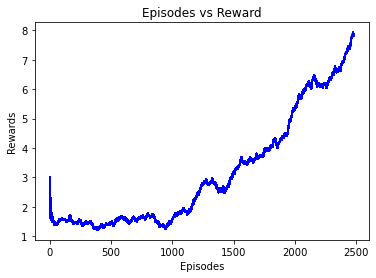

In [7]:

for e in range(start, EPISODES):
    done = False
    score = 0

    history = np.zeros([5, 84, 84], dtype=np.uint8)
    step = 0
    state = env.reset()
    next_state = state
    life = number_lives

    get_init_state(history, state, HISTORY_SIZE)

    while not done:
        step += 1
        frame += 1

        # Perform a fire action if ball is no longer on screen to continue onto next life
        if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
            action = 0
        else:
            action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
        state = next_state
        next_state, reward, done, info = env.step(action + 1)
        
        frame_next_state = get_frame(next_state)
        history[4, :, :] = frame_next_state
        terminal_state = check_live(life, info['lives'])

        life = info['lives']
        r = reward

        # Store the transition in memory 
        
        # notes: memory management for preventing overuse of memory
        agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
#         agent.memory.half_length()
        

        # Start training after random sample generation
        if(frame >= train_frame):
            agent.train_policy_net(frame)
            # Update the target network only for Double DQN only
            if double_dqn and (frame % update_target_network_frequency)== 0:
                agent.update_target_net()
        score += reward
        history[:4, :, :] = history[1:, :, :]
            
        if done:
            evaluation_reward.append(score)
            rewards.append(np.mean(evaluation_reward))
            episodes.append(e)
            pylab.plot(episodes, rewards, 'b')
            pylab.xlabel('Episodes')
            pylab.ylabel('Rewards') 
            pylab.title('Episodes vs Reward')
            pylab.savefig("./save_graph/breakout_dqn.png") # save graph for training visualization
            
            # every episode, plot the play time
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon, "   steps:", step,
                  "   lr:", agent.optimizer.param_groups[0]['lr'], "    evaluation reward:", np.mean(evaluation_reward))

            # if the mean of scores of last 100 episode is bigger than 5 save model
            ### Change this save condition to whatever you prefer ###
            if np.mean(evaluation_reward) > 5 and np.mean(evaluation_reward) > best_eval_reward:
#                 torch.save(agent.policy_net, "./save_model/breakout_dqn.pth")
                torch.save(agent.policy_net.state_dict(), f"./breakout_dqn.pth")
                best_eval_reward = np.mean(evaluation_reward)


In [ ]:
# print(agent.memory)
# params = dict()
# # params["epsilon"] = agent.epsilon
# # params["agent_memory"]= agent.memory
# params["rewards"] = rewards 
# params["episodes"] = episodes
# params["best_eval_reward"] = best_eval_reward
# joblib.dump(agent,"prev_agent")
# joblib.dump(params,"prev_params")

In [8]:
torch.save(agent.policy_net.state_dict(), f"./save_model/breakout_DQN_2000_episodes_huber.pth")